copio introduzione e un po' di roba

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.manifold import Isomap

riduco le dimensioni da 64 a 2

In [14]:
digits = datasets.load_digits()
print(digits.images.shape)
print(digits.keys())

model = Isomap(n_neighbors=7, n_components=2)

(1797, 8, 8)
dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


n_neighbors = 7 è il numero minimo che mi rende il grafo completamente connesso.
n_components in realtà lo scegli un po' a caso, poi fai dei test per vedere se è ok.

In [15]:
X = digits.data
print(X.shape)

(1797, 64)


In [16]:
X_reduced = model.fit_transform(X)
print("Reduced dataset shape:", X_reduced.shape)


Reduced dataset shape: (1797, 2)


un grafico 2d delle due nuove dimensioni. I 4 e i 5 sono abbastanza separati, anche i 7, ma il resto è tutto molto mischiato.

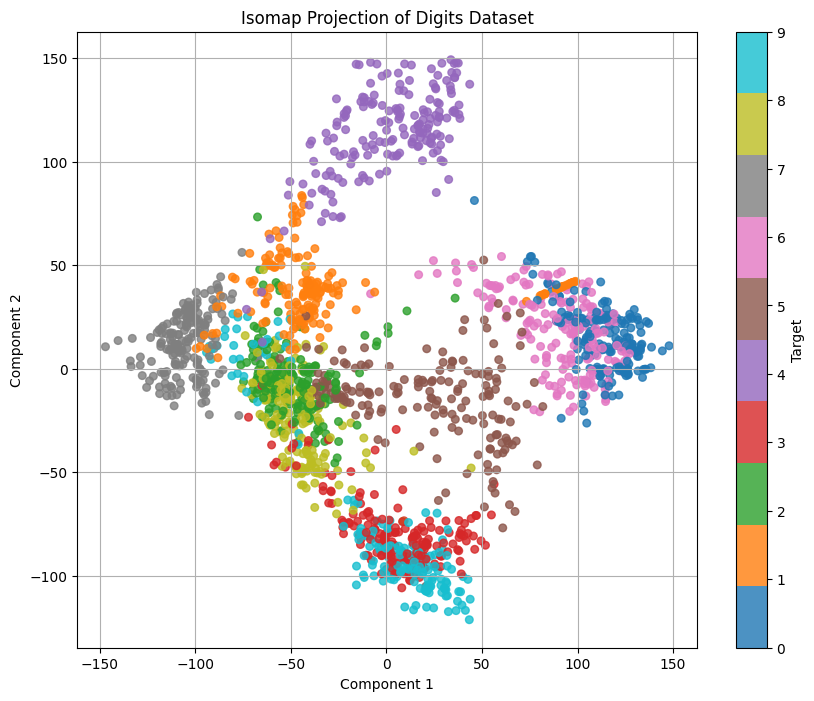

In [17]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=digits.target, cmap='tab10', s=30, alpha=0.8)
plt.colorbar(scatter, label='Target')
plt.title('Isomap Projection of Digits Dataset')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.grid(True)
plt.show()

proviamo ad aumentare le dimensioni ridotte

In [19]:
model = Isomap(n_neighbors=7, n_components=5)
X_reduced = model.fit_transform(X)

Usiamo un secondo modello di riduzione dimensionale per ottenere una visualizzazione 2D sensata

VERIFICO SE È UNA COSA CHE POSSO FARE OPPURE NO 

In [20]:
from sklearn.manifold import TSNE

tsne_model = TSNE(n_components=2, random_state=42)
X_reduced_tsne = tsne_model.fit_transform(X_reduced)

proviamo a visualizzare

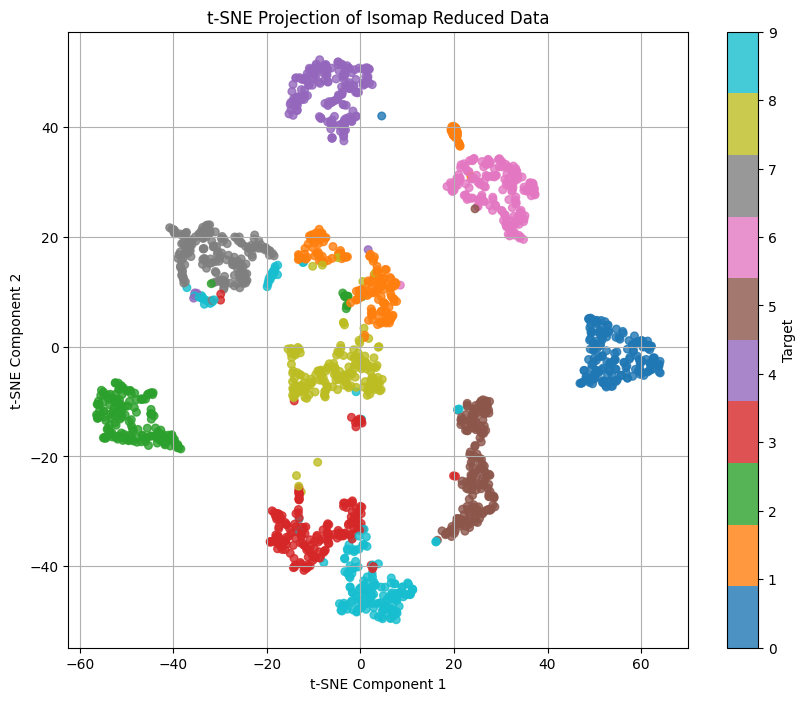

In [21]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_reduced_tsne[:, 0], X_reduced_tsne[:, 1], c=digits.target, cmap='tab10', s=30, alpha=0.8)
plt.colorbar(scatter, label='Target')
plt.title('t-SNE Projection of Isomap Reduced Data')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.grid(True)
plt.show()

Molto molto meglio.

Facciamo lo stesso ma con più dimensioni mantenute

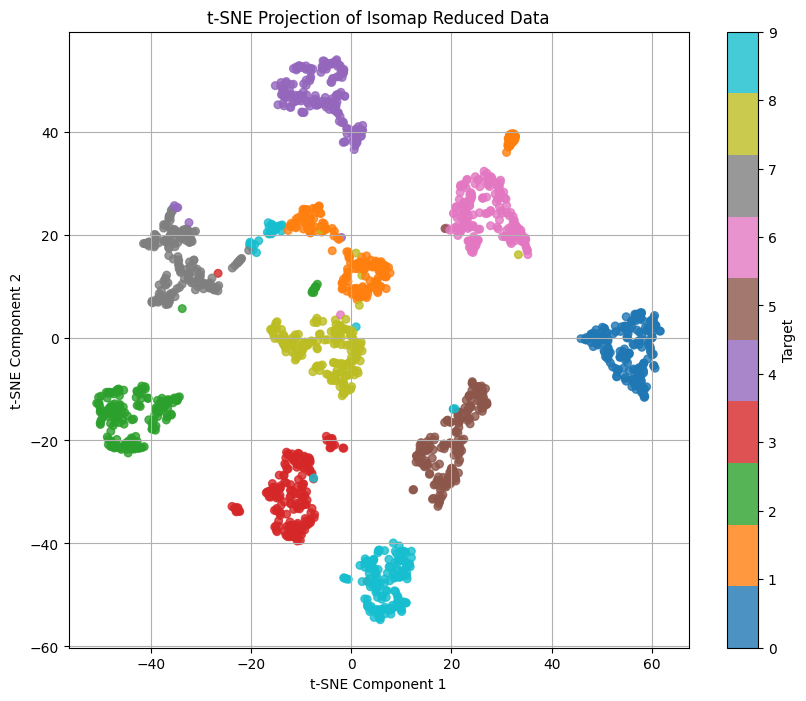

In [22]:
model = Isomap(n_neighbors=7, n_components=20)
X_reduced = model.fit_transform(X)

tsne_model = TSNE(n_components=2, random_state=42)
X_reduced_tsne = tsne_model.fit_transform(X_reduced)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_reduced_tsne[:, 0], X_reduced_tsne[:, 1], c=digits.target, cmap='tab10', s=30, alpha=0.8)
plt.colorbar(scatter, label='Target')
plt.title('t-SNE Projection of Isomap Reduced Data')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.grid(True)
plt.show()

ancora, ma occhio, più dimensioni = più tempo


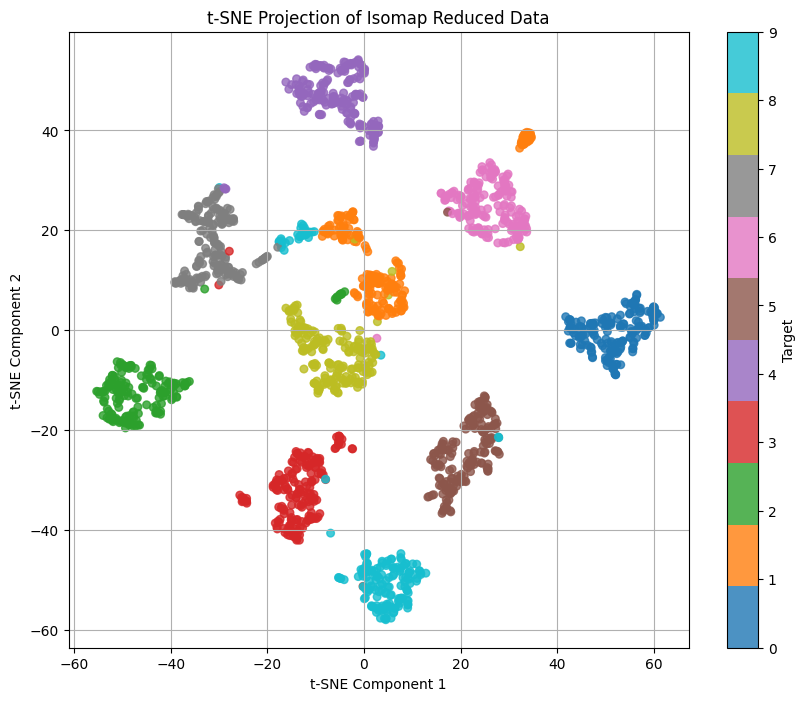

In [ ]:
model = Isomap(n_neighbors=7, n_components=32)
X_reduced = model.fit_transform(X)

tsne_model = TSNE(n_components=2, random_state=42)
X_reduced_tsne = tsne_model.fit_transform(X_reduced)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_reduced_tsne[:, 0], X_reduced_tsne[:, 1], c=digits.target, cmap='tab10', s=30, alpha=0.8)
plt.colorbar(scatter, label='Target')
plt.title('t-SNE Projection of Isomap Reduced Data')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.grid(True)
plt.show()

questo non so se lo tengo che non è super utile

ora divido i dati ridotti in training set e test set

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

y = digits.target

Xtrain, Xtest, ytrain, ytest = train_test_split(X_reduced, y,test_size=0.2)






[[32  0  0  0  0  0  0  0  0  0]
 [ 0 33  0  0  0  0  0  0  0  0]
 [ 0  0 38  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  1  0  0]
 [ 0  0  0  0 34  0  0  0  0  0]
 [ 0  0  0  0  0 35  0  0  0  1]
 [ 0  0  0  0  0  0 31  0  0  0]
 [ 0  0  0  0  0  0  0 40  0  0]
 [ 0  0  0  0  0  0  0  0 33  1]
 [ 0  0  0  0  0  0  0  0  1 46]]
Percentuale di predizioni corrette: 98.89%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      1.00      1.00        33
           2       1.00      1.00      1.00        38
           3       1.00      0.97      0.99        35
           4       1.00      1.00      1.00        34
           5       1.00      0.97      0.99        36
           6       1.00      1.00      1.00        31
           7       0.98      1.00      0.99        40
           8       0.97      0.97      0.97        34
           9       0.96      0.98      0.97        47

    accuracy                  

se non inserisco l'opzione, potrei avere sempre risultati leggermente diversi

Importo modello e lo fitto

In [28]:
model_logistic = LogisticRegression()

model_logistic.fit(Xtrain, ytrain)
y_pred = model_logistic.predict(Xtest)
y_pred_train = model_logistic.predict(Xtrain)


faccio predizioni e controllo accuratezza delle predizioni con punteggio, 

In [31]:
cm = confusion_matrix(ytest, y_pred)
print(cm)

accuracy = model_logistic.score(Xtest, ytest)
print(f"Percentuale di predizioni corrette: {accuracy * 100:.2f}%")

print(classification_report(ytest, y_pred))



[[32  0  0  0  0  0  0  0  0  0]
 [ 0 33  0  0  0  0  0  0  0  0]
 [ 0  0 38  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  1  0  0]
 [ 0  0  0  0 34  0  0  0  0  0]
 [ 0  0  0  0  0 35  0  0  0  1]
 [ 0  0  0  0  0  0 31  0  0  0]
 [ 0  0  0  0  0  0  0 40  0  0]
 [ 0  0  0  0  0  0  0  0 33  1]
 [ 0  0  0  0  0  0  0  0  1 46]]
Percentuale di predizioni corrette: 98.89%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      1.00      1.00        33
           2       1.00      1.00      1.00        38
           3       1.00      0.97      0.99        35
           4       1.00      1.00      1.00        34
           5       1.00      0.97      0.99        36
           6       1.00      1.00      1.00        31
           7       0.98      1.00      0.99        40
           8       0.97      0.97      0.97        34
           9       0.96      0.98      0.97        47

    accuracy                  

accuracy di train e test


In [30]:
print("Train accuracy:", accuracy_score(ytrain, y_pred_train))
print("Test accuracy:", accuracy_score(ytest, y_pred))

Train accuracy: 1.0
Test accuracy: 0.9888888888888889


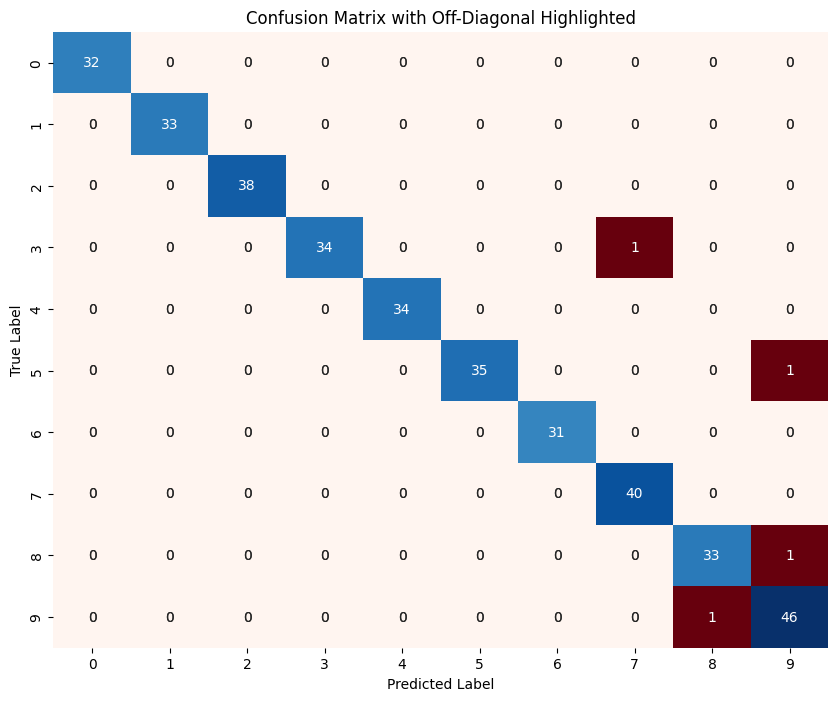

In [ ]:
import seaborn as sns

mask = np.eye(cm.shape[0], dtype=bool)  

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=model_logistic.classes_, yticklabels=model_logistic.classes_)

sns.heatmap(cm, mask=mask, annot=True, fmt='d', cmap='Reds', cbar=False, xticklabels=model_logistic.classes_, yticklabels=model_logistic.classes_)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()